<a href="https://colab.research.google.com/github/orion-ai/CG/blob/master/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import io

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, recall_score, precision_score
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from google.colab import files

from imblearn.over_sampling import RandomOverSampler

from scipy.stats import randint

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Gathering the Data

In [68]:
data = files.upload()

Saving test.csv.zip to test.csv (1).zip
Saving train.csv.zip to train.csv (1).zip


In [69]:
train=pd.read_csv("train.csv.zip") 
test=pd.read_csv("test.csv.zip")

In [70]:
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)

# EDA(Data Analysis)

In [71]:
train.shape

(58592, 44)

In [72]:
test.shape

(39063, 43)

In [73]:
train.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [74]:
test.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,ID58593,0.341732,0.00,0.586538,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0
1,ID58594,0.307241,0.13,0.442308,C8,8794,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,No,Yes,No,Yes,No,Drum,1197,4,Manual,5,Electric,4.8,3845,1735,1530,1335,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
2,ID58595,0.327924,0.12,0.451923,C8,8794,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2
3,ID58596,0.782654,0.01,0.461538,C5,34738,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0
4,ID58597,1.233404,0.02,0.634615,C5,34738,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0


In [75]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [76]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39063 entries, 0 to 39062
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         39063 non-null  object 
 1   policy_tenure                     39063 non-null  float64
 2   age_of_car                        39063 non-null  float64
 3   age_of_policyholder               39063 non-null  float64
 4   area_cluster                      39063 non-null  object 
 5   population_density                39063 non-null  int64  
 6   make                              39063 non-null  int64  
 7   segment                           39063 non-null  object 
 8   model                             39063 non-null  object 
 9   fuel_type                         39063 non-null  object 
 10  max_torque                        39063 non-null  object 
 11  max_power                         39063 non-null  object 
 12  engi

In [78]:
#This shows the data set is heavily imbalanced
train['is_claim'].value_counts()/train.shape[0] * 100

0    93.603222
1     6.396778
Name: is_claim, dtype: float64

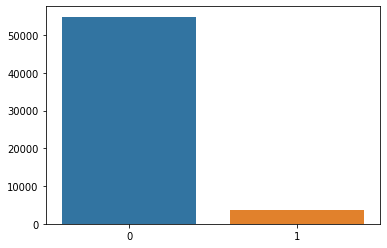

In [77]:
sns.barplot(x = [0, 1], y = [54844, 3784])

In [79]:
train["policy_id"].duplicated().sum()

0

In [81]:
data = train.set_index("policy_id")

In [82]:
def data_solver_strings(data):

    data["max_torque_Nm"] = data["max_torque"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*Nm)").astype('float64')
    data["max_torque_rpm"] = data["max_torque"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*rpm)").astype('float64')
    
    data["max_power_bhp"] = data["max_power"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*bhp)").astype('float64')
    data["max_power_rpm"] = data["max_power"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*rpm)").astype('float64')

    data.drop(["max_torque","max_power"], axis=1, inplace=True)

data_solver_strings(data)

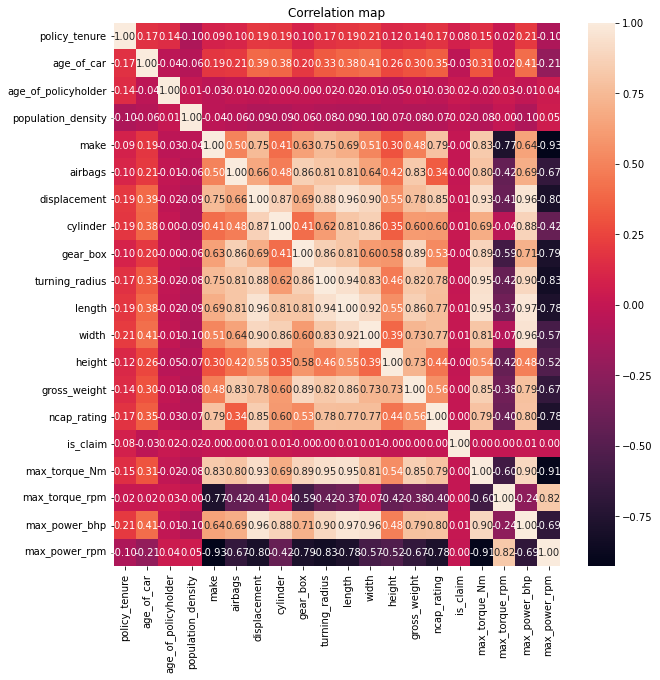

In [83]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, fmt=".2f", ax=ax )
plt.title("Correlation map")
plt.show()

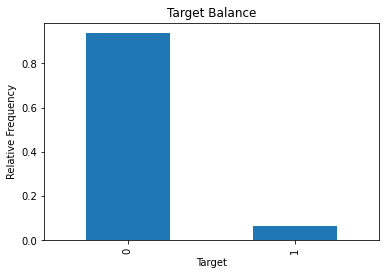

In [85]:
# TARGET  BALANCE 
train["is_claim"].value_counts(normalize=True).plot(kind="bar")
plt.ylabel("Relative Frequency")
plt.xlabel("Target")
plt.title("Target Balance");

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


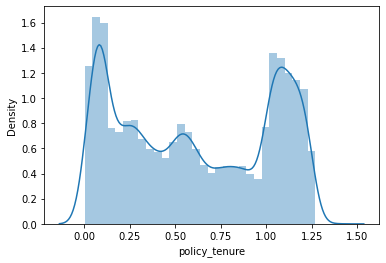

In [105]:
# checking for outliers
sns.distplot(train["policy_tenure"]);

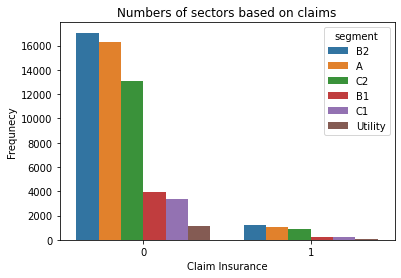

In [86]:
# Numbers of segments based on cliams

ffg = train.groupby("is_claim")["segment"].value_counts().rename("Frequency").to_frame().reset_index()
sns.barplot(x="is_claim",
           y="Frequency",
           hue="segment",
           data=ffg)
plt.xlabel("Claim Insurance")
plt.ylabel("Frequnecy")
plt.title("Numbers of sectors based on claims");

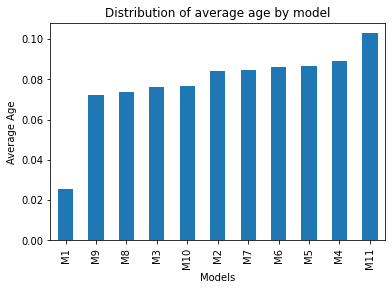

In [87]:
## distribution of average age by model
train.groupby("model")["age_of_car"].mean().sort_values().plot(kind="bar")
plt.xlabel("Models")
plt.ylabel("Average Age")
plt.title("Distribution of average age by model");

In [88]:
target = "is_claim"
X = train.drop(target, axis=1)
y = train[target]
print(X.shape, y.shape)

(58592, 43) (58592,)


In [89]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [90]:
from imblearn.over_sampling import RandomOverSampler
sampler = RandomOverSampler(random_state=1)
X_train_over, y_train_over = sampler.fit_resample(X_train,y_train)
print(X_train_over.shape, y_train_over.shape)

(87764, 43) (87764,)


In [91]:
model_baseline = y_train.value_counts(normalize=True).max()
model_baseline

0.9361892774091695

In [92]:
def vif_check(data_check):
    vif_data = pd.DataFrame()
    vif_data["feature"] = data_check.columns
  
    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(data_check.values, i)
                          for i in range(len(data_check.columns))]
  
    return vif_data.sort_values("VIF", ascending=False).reset_index()

In [93]:
data_check = data.select_dtypes(exclude=["object"]).drop("is_claim", axis=1)

#cycle which returns features having VIF < 5, or Featues with low correlation
while vif_check(data_check)["VIF"][0] > 5:
    data_check.drop(vif_check(data_check)["feature"][0], axis=1, inplace=True)
feature_vif_table = vif_check(data_check)

feature_vif_table

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,index,feature,VIF
0,3,airbags,3.587326
1,4,ncap_rating,3.221815
2,1,age_of_car,2.779371
3,0,policy_tenure,2.698111
4,2,population_density,1.684834


In [94]:
data_clean = pd.concat([data.select_dtypes("object"), 
                        data[list(feature_vif_table["feature"])], 
                        data["is_claim"]], axis=1)

In [95]:
data_clean.describe()

,airbags,ncap_rating,age_of_car,policy_tenure,population_density,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000
mean,3.137066,1.759950,0.069424,0.611246,18826.858667,0.063968
std,1.832641,1.389576,0.056721,0.414156,17660.174792,0.244698
min,1.000000,0.000000,0.000000,0.002735,290.000000,0.000000
25%,2.000000,0.000000,0.020000,0.210250,6112.000000,0.000000
50%,2.000000,2.000000,0.060000,0.573792,8794.000000,0.000000
75%,6.000000,3.000000,0.110000,1.039104,27003.000000,0.000000
max,6.000000,5.000000,1.000000,1.396641,73430.000000,1.000000


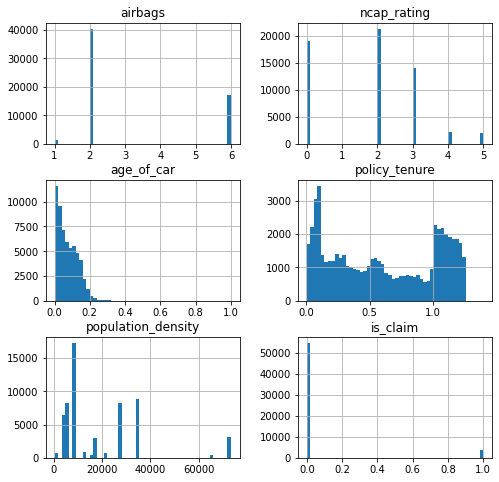

In [96]:
data_clean.hist(bins=50, figsize=(8,8))
plt.show()

In [97]:
data_clean = data_clean[data_clean["age_of_car"] < 0.25] 

# Preprocessing

In [98]:
X = data_clean.drop("is_claim", axis=1)
y = data_clean["is_claim"]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=737, test_size=0.2, stratify=y)

In [99]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_valid = pd.get_dummies(X_valid, drop_first=True)

In [100]:
sampler = RandomOverSampler(random_state=737)
X_train_over, y_train_over = sampler.fit_resample(X_train,y_train)

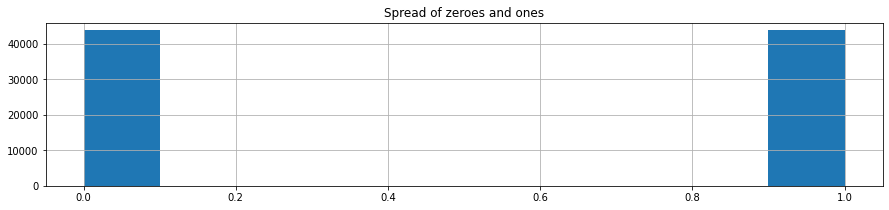

In [101]:
y_train_over.hist(figsize=(15,3))
plt.title("Spread of zeroes and ones")
plt.show()

# Base Model

 **Base Model**

In [102]:
dummy = DummyClassifier(strategy="stratified", random_state=737)
dummy.fit(X_train_over, y_train_over)
predicted_valid = dummy.predict(X_valid)
accuracy = accuracy_score(y_valid, predicted_valid)
ras = roc_auc_score(y_valid, dummy.predict_proba(X_valid)[:, 1])
f1 = f1_score(y_valid, predicted_valid)
recall = recall_score(y_valid, predicted_valid)
precision = precision_score(y_valid, predicted_valid)
print("Accuracy score = ", accuracy)
print("AUC-ROC score = ", ras)
print("F1 score = ", f1)
print("Recall score = ", recall)
print("Precision score = ", precision)

Accuracy score =  0.4964423489069867
AUC-ROC score =  0.4974766456084045
F1 score =  0.11268882175226586
Recall score =  0.49866310160427807
Precision score =  0.06352179836512262


# Model

In [103]:
model = RandomForestClassifier(random_state=737)
np.random.seed(737)

param_distributions = {"max_depth": randint(3,10), 
                       "min_samples_split": randint(2, 9),
                       "min_samples_leaf": randint(2, 9)
                      }
search = HalvingRandomSearchCV(model, param_distributions, resource="n_estimators",
                               max_resources=50,
                               random_state=737,
                               scoring="f1",
                               cv=5).fit(X_train_over, y_train_over)
search.best_params_

{'max_depth': 9,
 'min_samples_leaf': 8,
 'min_samples_split': 8,
 'n_estimators': 27}

In [104]:
model = RandomForestClassifier(random_state=737, **search.best_params_)
model.fit(X_train_over, y_train_over)
predicted_valid = model.predict(X_valid)
accuracy = accuracy_score(y_valid, predicted_valid)
ras = roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1])
f1 = f1_score(y_valid, predicted_valid)
recall = recall_score(y_valid, predicted_valid)
precision = precision_score(y_valid, predicted_valid)
print("Accuracy score = ", accuracy)
print("AUC-ROC score = ", ras)
print("F1 score = ", f1)
print("Recall score = ", recall)
print("Precision score = ", precision)

Accuracy score =  0.5873124732104587
AUC-ROC score =  0.6416906566268867
F1 score =  0.16481609993060375
Recall score =  0.6350267379679144
Precision score =  0.0946969696969697
